# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head(20)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


## Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [18]:
from sklearn.linear_model import LinearRegression
direct_bilirubin = data['Direct_Bilirubin']
total_bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(direct_bilirubin).reshape(-1,1), total_bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.42502700059429843
slope: [1.93375953]


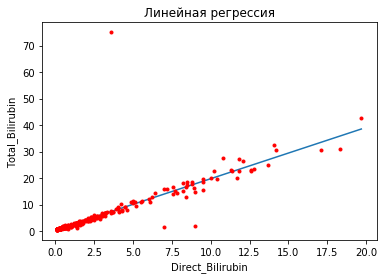

In [19]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(direct_bilirubin), max(direct_bilirubin))
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(direct_bilirubin, total_bilirubin, 'r.')
plt.show()

In [20]:
# выводим строки таблицы со значением 3.0
data [data ['Direct_Bilirubin'] == 3.0]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
22,62,Male,6.8,3.0,542,116,66,6.4,3.1,0.90,1
27,34,Male,6.2,3.0,240,1680,850,7.2,4.0,1.20,1
97,39,Male,6.6,3.0,215,190,950,4.0,1.7,0.70,1
114,50,Male,5.8,3.0,661,181,285,5.7,2.3,0.67,2
191,60,Male,5.8,3.0,257,107,104,6.6,3.5,1.12,1


In [21]:
# предсказываем значение с помощью метода predict
# похоже на правду
model.predict(np.array([3.0]).reshape(-1, 1))

array([6.2263056])

In [22]:
# выводим строки таблицы со значением Direct_Bilirubin = 7.5. Таких строк нет, поэтому сортируем таблицу по ближайшим значениям.
data[data ['Direct_Bilirubin'] >= 7.2].sort_values('Direct_Bilirubin').head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
536,46,Male,15.8,7.2,227,67,220,6.9,2.6,0.60,1
561,66,Male,16.6,7.6,315,233,384,6.9,2.0,0.40,1
172,55,Male,14.1,7.6,750,35,63,5.0,1.6,0.47,1
560,66,Male,15.2,7.7,356,321,562,6.5,2.2,0.40,1
37,46,Female,14.2,7.8,374,38,77,4.3,2.0,0.80,1


In [23]:
# похоже на правду
model.predict(np.array([7.5]).reshape(-1, 1))

array([14.92822349])

## Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

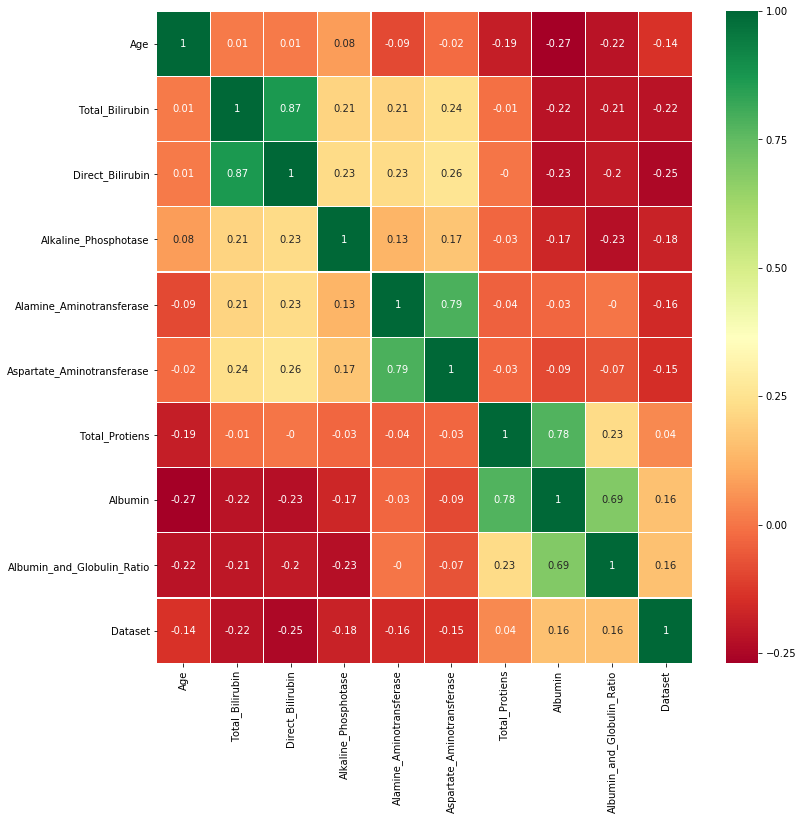

In [24]:
sns.heatmap(data.corr().round(2),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [25]:
# предсказываем по столбцам Age и Albumin
dataset = data['Dataset']
age = data['Age']
albumin = data['Albumin']
x = np.vstack([np.array(age), np.array(albumin)]).T
y = np.array(dataset)
model = LinearRegression().fit(x, y)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 1.173415634443744
slope: [-0.00284017  0.07642645]


In [26]:
# предсказание не совсем точное, так как 3 пациент болен, а 8 здоров, но немного точнее, чем на выборках ниже
print('Предсказание модели: ', model.predict(np.array (x [[3,8]])))

Предсказание модели:  [1.26853542 1.4384811 ]


In [27]:
print('Предсказание модели: ', model.predict(np.array (x [[2,17]])))

Предсказание модели:  [1.24953208 1.34718243]


In [28]:
print('Предсказание модели: ', model.predict(np.array (x [[4,12]])))

Предсказание модели:  [1.15234652 1.25149437]


## Посчитать квартили для всех колонок. 

In [29]:
data.describe ()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

Выборка пациентов до 50 лет. Среднее значение по колонкам:  Age                            34.181303
Total_Bilirubin                 3.215014
Direct_Bilirubin                1.494618
Alkaline_Phosphotase          266.560907
Alamine_Aminotransferase       94.328612
Aspartate_Aminotransferase    115.229462
Total_Protiens                  6.595467
Albumin                         3.271388
Albumin_and_Globulin_Ratio      0.991629
Dataset                         1.317280
dtype: float64
Выборка пациентов до 50 лет. Квартиль 0,5:  Age                            35.0
Total_Bilirubin                 0.9
Direct_Bilirubin                0.3
Alkaline_Phosphotase          205.0
Alamine_Aminotransferase       36.0
Aspartate_Aminotransferase     42.0
Total_Protiens                  6.7
Albumin                         3.2
Albumin_and_Globulin_Ratio      1.0
Dataset                         1.0
Name: 0.5, dtype: float64


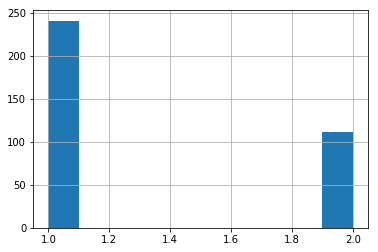

In [30]:
age_before50 = data[data ['Age'] <= 49]
print ('Выборка пациентов до 50 лет. Среднее значение по колонкам: ', age_before50.mean ())
print ('Выборка пациентов до 50 лет. Квартиль 0,5: ', age_before50.quantile(0.50, axis = 0))
age_before50 ['Dataset'].hist ()

Выборка пациентов после 50 лет включительно. Среднее значение по колонкам:  Age                            60.960870
Total_Bilirubin                 3.427391
Direct_Bilirubin                1.473043
Alkaline_Phosphotase          327.434783
Alamine_Aminotransferase       59.817391
Aspartate_Aminotransferase    101.747826
Total_Protiens                  6.310870
Albumin                         2.943043
Albumin_and_Globulin_Ratio      0.878952
Dataset                         1.239130
dtype: float64
Выборка пациентов после 50 лет включительно. Квартиль 0,5:  Age                            60.00
Total_Bilirubin                 1.10
Direct_Bilirubin                0.40
Alkaline_Phosphotase          214.50
Alamine_Aminotransferase       33.00
Aspartate_Aminotransferase     40.50
Total_Protiens                  6.40
Albumin                         3.00
Albumin_and_Globulin_Ratio      0.88
Dataset                         1.00
Name: 0.5, dtype: float64


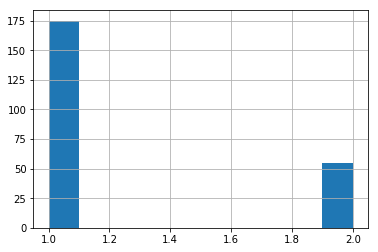

In [33]:
age_after50 = data[data ['Age'] >= 50]
print ('Выборка пациентов после 50 лет включительно. Среднее значение по колонкам: ', age_after50.mean ())
print ('Выборка пациентов после 50 лет включительно. Квартиль 0,5: ', age_after50.quantile(0.50, axis = 0))
age_after50 ['Dataset'].hist ()

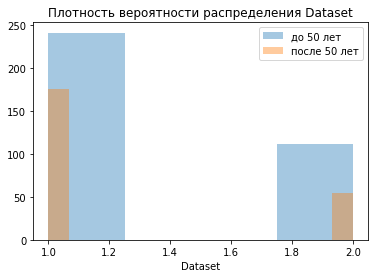

In [34]:
sns.distplot(age_before50 ['Dataset'], kde = False)
sns.distplot(age_after50 ['Dataset'], kde = False)
plt.title('Плотность вероятности распределения Dataset')
plt.legend(['до 50 лет', 'после 50 лет'])
plt.show()

Среднее значение Dataset уменьшилось с вместе с возрастом с 1.317280 до 1.239130, что говорит о том, что вероятность болезни с возрастом выше. Количество пациентов после 50 лет меньше, чем до 50 лет, медиана (квартиль 0,5) поменялась, местами довольно значительно. Например Total_Bilirubin у пациентов до 50 лет составляет  0.9, а у пациентов после 50 лет - 1.10. 


## Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [22]:
ill = data [data ['Dataset'] == 1] ['Total_Bilirubin']
stats.ttest_1samp(ill, data['Total_Bilirubin'].mean ())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

p-value равно 0.01, что меньше стандартной альфа ошибки 0.05, поэтому мы не принимаем нулевую гипотезу и можем сказать, что имеется статистическое различие между Total_Bilirubin у больных людей и генеральной совокупности в целом.

## Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [23]:
healthy = data [data ['Dataset'] == 2] ['Total_Bilirubin']
stats.ttest_ind(ill, healthy)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

T-значение 5.44, p-value равно 7.80, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между Total_Bilirubin у больных и здоровых людей.

## Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [24]:
# при помощи t- критерия для каждой выборки:
young = data[data ['Age'] < 30] ['Dataset']
adult = data[[data ['Age'] >= 30] and data ['Age'] < 55] ['Dataset']
old = data[data ['Age'] >= 55] ['Dataset']
print ('Статистическая значимость для первой группы :',stats.ttest_1samp(young, data['Dataset'].mean ()))
print ('Статистическая значимость для второй группы :',stats.ttest_1samp(adult, data['Dataset'].mean ()))
print ('Статистическая значимость для третьей группы :',stats.ttest_1samp(old, data['Dataset'].mean ()))

Статистическая значимость для первой группы : Ttest_1sampResult(statistic=3.4943370865315453, pvalue=0.0006995942967200813)
Статистическая значимость для второй группы : Ttest_1sampResult(statistic=0.6915989710833373, pvalue=0.48958449169269636)
Статистическая значимость для третьей группы : Ttest_1sampResult(statistic=-1.1135475530910417, pvalue=0.2670004744505378)


In [25]:
# при помощи множественного теста ANOVA
stats.f_oneway(young, adult, old)

F_onewayResult(statistic=6.920077294006607, pvalue=0.0010582949659852085)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у возрастных групп по казателям здоровья и болезни. 

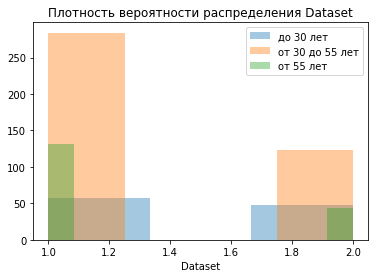

In [26]:
sns.distplot(young, kde = False)
sns.distplot(adult, kde = False)
sns.distplot(old, kde = False)
plt.title('Плотность вероятности распределения Dataset')
plt.legend(['до 30 лет', 'от 30 до 55 лет', 'от 55 лет'])
plt.show()

Первая группа сильно отличается от генеральной совокупности, тогда как вторая и третья не отличаются. На графике видно, что распределение по первой группе почти равномерно

Вопросы задавать на почту yustiks@gmail.com